Simple example of using evolution strategies inside `es.py` for toy deterministic fitness function.

In [7]:
!pip install cma

     |████████████████████████████████| 230 kB 3.1 MB/s eta 0:00:01


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import SimpleGA, CMAES, PEPG, OpenES

In [9]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

fit_func = rastrigin

In [10]:
NPARAMS = 100        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 4000 # run each solver for 5000 generations.

In [11]:
# defines a function to use solver to solve fit_func
def test_solver(solver):
  history = []
  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    fitness_list = np.zeros(solver.popsize)
    for i in range(solver.popsize):
      fitness_list[i] = fit_func(solutions[i])
    solver.tell(fitness_list)
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])
    if (j+1) % 100 == 0:
      print("fitness at iteration", (j+1), result[1])
  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history

In [12]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(rastrigin(x))

This is F(0):
-10000.0


In [13]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print(rastrigin(x))
print("global optimum point:\n", x)

-0.0
global optimum point:
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [14]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=0.5,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [27]:
ga.ask()

array([[ 8.98183616,  9.03616064, 11.99149107, ..., 10.00384339,
         7.99722775,  8.98857892],
       [ 8.97603217,  9.01513393, 12.02419783, ..., 10.00775083,
         8.02789884,  8.9814354 ],
       [ 9.01871882,  9.02593958, 11.99276873, ...,  9.96585011,
         8.00020735,  8.98591924],
       ...,
       [ 8.9966236 ,  9.02178945, 11.9896013 , ...,  9.99754868,
         7.98987662,  8.98486316],
       [ 9.01685889,  9.03978507, 11.99782345, ..., 10.01403036,
         8.02582365,  9.02126089],
       [ 8.99863401,  9.03326574, 11.99763317, ..., 10.0040107 ,
         7.99781999,  8.99426786]])

In [15]:
ga_history = test_solver(ga)

fitness at iteration 100 -1201.0718774897778
fitness at iteration 200 -1088.8817519226059
fitness at iteration 300 -1011.4105789192732
fitness at iteration 400 -993.9885166141202
fitness at iteration 500 -945.7529790897486
fitness at iteration 600 -911.9230725650001
fitness at iteration 700 -860.3479535343504
fitness at iteration 800 -845.4229318994376
fitness at iteration 900 -813.1960259458623
fitness at iteration 1000 -790.132653037012
fitness at iteration 1100 -740.3644119634453
fitness at iteration 1200 -706.3196335894718
fitness at iteration 1300 -650.1584279259207
fitness at iteration 1400 -600.2312588345467
fitness at iteration 1500 -589.6490501638834
fitness at iteration 1600 -495.197051461632
fitness at iteration 1700 -464.2878632068756
fitness at iteration 1800 -412.243935231205
fitness at iteration 1900 -388.9985343923622
fitness at iteration 2000 -350.89265216534045
fitness at iteration 2100 -326.23791720475515
fitness at iteration 2200 -294.91358466124836
fitness at itera

In [16]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.5
          )

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=1114419, Tue Jul 28 23:56:52 2020)


In [17]:
cma_history = test_solver(cmaes)

fitness at iteration 100 -965.5897835794776
fitness at iteration 200 -834.984892353484
fitness at iteration 300 -771.0211911844362
fitness at iteration 400 -455.4473870839969
fitness at iteration 500 -45.21829852505073
fitness at iteration 600 -44.77337977090497
fitness at iteration 700 -44.77314761733669
fitness at iteration 800 -44.77314749362438
fitness at iteration 900 -44.77314749356003
fitness at iteration 1000 -44.77314749356003
fitness at iteration 1100 -44.77314749356003
fitness at iteration 1200 -44.77314749356003
fitness at iteration 1300 -44.77314749356003
fitness at iteration 1400 -44.77314749356003
fitness at iteration 1500 -44.77314749356003
fitness at iteration 1600 -44.77314749356003
fitness at iteration 1700 -44.77314749356003
fitness at iteration 1800 -44.77314749356003
fitness at iteration 1900 -44.77314749356003
fitness at iteration 2000 -44.77314749356003
fitness at iteration 2100 -44.77314749356003
fitness at iteration 2200 -44.77314749356003
fitness at iteration

In [18]:
# defines PEPG (NES) solver
pepg = PEPG(NPARAMS,                         # number of model parameters
            sigma_init=0.5,                  # initial standard deviation
            learning_rate=0.1,               # learning rate for standard deviation
            learning_rate_decay=1.0,       # don't anneal the learning rate
            popsize=NPOPULATION,             # population size
            average_baseline=False,          # set baseline to average of batch
            weight_decay=0.00,            # weight decay coefficient
            rank_fitness=False,           # use rank rather than fitness numbers
            forget_best=False)            # don't keep the historical best solution)

In [19]:
pepg_history = test_solver(pepg)

fitness at iteration 100 -3482.2923814864066
fitness at iteration 200 -1255.3117431722062
fitness at iteration 300 -933.1809954887351
fitness at iteration 400 -853.7852009514326
fitness at iteration 500 -617.4651585388015
fitness at iteration 600 -481.0182192281427
fitness at iteration 700 -435.04474114784955
fitness at iteration 800 -324.3240221489534
fitness at iteration 900 -241.10429385138696
fitness at iteration 1000 -200.5763762760712
fitness at iteration 1100 -176.47122980621475
fitness at iteration 1200 -167.6703765732609
fitness at iteration 1300 -158.827912950851
fitness at iteration 1400 -148.93195895249005
fitness at iteration 1500 -138.91644365482853
fitness at iteration 1600 -132.56058489833504
fitness at iteration 1700 -129.99633600028926
fitness at iteration 1800 -128.2200824907353
fitness at iteration 1900 -126.83692887720679
fitness at iteration 2000 -125.80050602158337
fitness at iteration 2100 -125.20540111040998
fitness at iteration 2200 -124.73274530799779
fitness

In [20]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=0.5,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [21]:
oes_history = test_solver(oes)

fitness at iteration 100 -2525.3126231110364
fitness at iteration 200 -838.7064318618364
fitness at iteration 300 -831.7633397291314
fitness at iteration 400 -831.7633397291314
fitness at iteration 500 -820.7433276217525
fitness at iteration 600 -779.7616868081591
fitness at iteration 700 -716.0311087607383
fitness at iteration 800 -664.4639053492299
fitness at iteration 900 -603.4819812925546
fitness at iteration 1000 -500.2147492929509
fitness at iteration 1100 -459.1842043965771
fitness at iteration 1200 -419.08357485337706
fitness at iteration 1300 -387.2094760041982
fitness at iteration 1400 -343.1058811445265
fitness at iteration 1500 -299.1897366282742
fitness at iteration 1600 -299.1897366282742
fitness at iteration 1700 -285.00268367329534
fitness at iteration 1800 -249.6984234790841
fitness at iteration 1900 -229.94731005570816
fitness at iteration 2000 -229.94731005570816
fitness at iteration 2100 -229.94731005570816
fitness at iteration 2200 -221.481175595443
fitness at ite

In [22]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
# this version turns on antithetic sampling. It doesn't really help, and sometimes hurts performance.
oes_antithetic = OpenES(NPARAMS,            # number of model parameters
                 sigma_init=0.5,            # initial standard deviation
                 sigma_decay=0.999,         # don't anneal standard deviation
                 learning_rate=0.1,         # learning rate for standard deviation
                 learning_rate_decay=1.0,   # annealing the learning rate
                 popsize=NPOPULATION+1,     # population size
                 antithetic=True,           # whether to use antithetic sampling
                 weight_decay=0.00,         # weight decay coefficient
                 rank_fitness=False,        # use rank rather than fitness numbers
                 forget_best=False)

In [23]:
oes_antithetic_history = test_solver(oes_antithetic)

fitness at iteration 100 -3254.845065509896
fitness at iteration 200 -952.6839372619124
fitness at iteration 300 -834.065502104961
fitness at iteration 400 -834.065502104961
fitness at iteration 500 -834.065502104961
fitness at iteration 600 -746.3433470023864
fitness at iteration 700 -696.7568108884109
fitness at iteration 800 -691.2351389504568
fitness at iteration 900 -596.7018546431675
fitness at iteration 1000 -535.9360607802125
fitness at iteration 1100 -469.6631414618016
fitness at iteration 1200 -437.0031568958476
fitness at iteration 1300 -381.44652794260605
fitness at iteration 1400 -374.7803505501895
fitness at iteration 1500 -344.73133292951286
fitness at iteration 1600 -335.61542559137536
fitness at iteration 1700 -301.579084956374
fitness at iteration 1800 -271.9070581132304
fitness at iteration 1900 -266.2414721189814
fitness at iteration 2000 -266.2414721189814
fitness at iteration 2100 -266.2414721189814
fitness at iteration 2200 -266.2414721189814
fitness at iteration

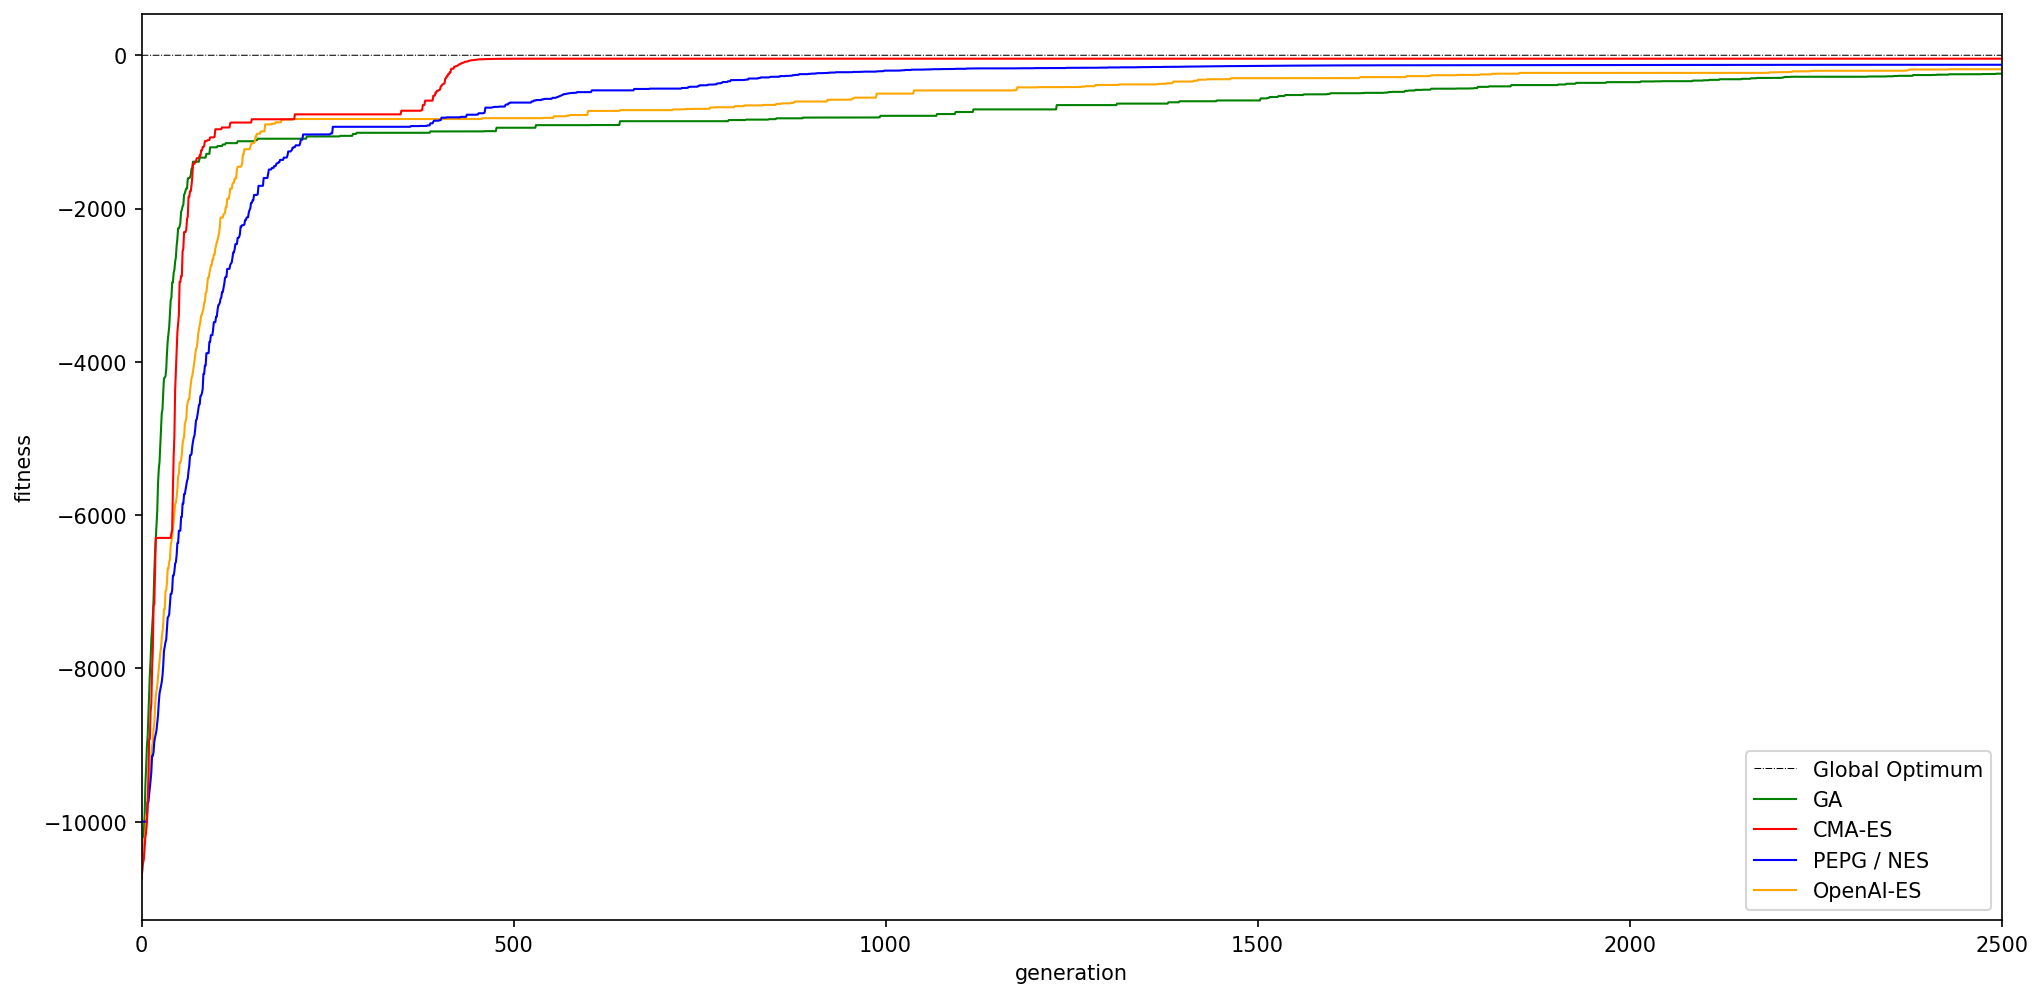

In [24]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(16,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
pepg_line, = plt.plot(pepg_history, color="blue", linewidth=1.0, linestyle="-", label='PEPG / NES')
cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')

plt.legend(handles=[optimum_line, ga_line, cma_line, pepg_line, oes_line], loc=4)

# Set x limits
plt.xlim(0,2500)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()

In [25]:
solver = EvolutionStrategy()

NameError: name 'EvolutionStrategy' is not defined